# Problem Statement
   Factor analysis is a useful technique to find latent factors that can potentially describe multiple
attributes, which is sometimes very useful for dimensionality reduction. Use the Airline
Passenger Satisfaction dataset to perform factor analysis. (Use only the columns that
represent the ratings given by the passengers, only 14 columns). Choose the best features
possible that helps in dimensionality reduction, without much loss in information.
Airline Passenger Satisfaction dataset

Dataset Link: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

Exploratory factor analysis or EFA is a statistical technique used to reduce data to a smaller set
of summary variables and to explore the underlying structure of a relatively large set of variables.
It is used to identify the underlying relationships between measured variables. Each observed
variable is considered as a potential measure of every factor, and the goal is to determine the
strongest relationships

# Importing Necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
train = train.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)

In [5]:
train.duplicated().sum()

0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
test.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [9]:
from scipy import stats
from scipy.stats import boxcox
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
train.shape

(103904, 24)

In [11]:
test.shape

(25976, 24)

In [12]:
print(f"Train data has {train.shape[0]} rows and  {train.shape[1]} columns.")
print("Distribution of target value:\n")
print(train['satisfaction'].value_counts())

Train data has 103904 rows and  24 columns.
Distribution of target value:

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [13]:
print(f"test data has {test.shape[0]} rows and  {test.shape[1]} columns.")
print("Distribution of target value:\n")
print(test['satisfaction'].value_counts())

test data has 25976 rows and  24 columns.
Distribution of target value:

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64


In [14]:
data=train.append(test)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [15]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [16]:
data.shape

(129880, 24)

In [17]:
data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


Minutes	129487.0	15.091129	38.465650	0.0	0.00	0.0	13.00	1584.0
For the Age column, we can see that the youngest passenger is 7 years old and the oldest passenger is 85 years old. Average age is 39. When we evaluate the quarters, we can observe that the age is evenly distributed.


For the Flight Distance column, we see that the minimum value is 414 and the maximum value is 4983. The average distance of flight is 1190. When we look at the quarters, we can say that there are outliers because there is too much difference between the 3rd quarter and the maximum value.


For the Departure Delay in Minutes and Arrival Delay in Minutes columns, the minimum value is 0 (which corresponds to no delay in that flights) and the maximum value is around 1500. When we examine the 3rd quarter and maximum values, we can see that there are too many outlier values.


There are many categorical features evaluated in 0-1-2-3-4-5 degrees. If we look at the averages of these ratings, the highest level of satisfaction is the Inflight service category with an average of 3.64, while the lowest is the Inflight wifi service category with an average of 2.72 points.

In [19]:
data.duplicated().sum()

0

In [20]:
data.nunique()

id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              466
Arrival Delay in Minutes        

In [21]:
data.loc[data["Customer Type"]=="disloyal Customer","Customer Type"]="Disloyal Customer"
data.loc[data["Type of Travel"]=="Business travel","Type of Travel"]="Business Travel"

In [22]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


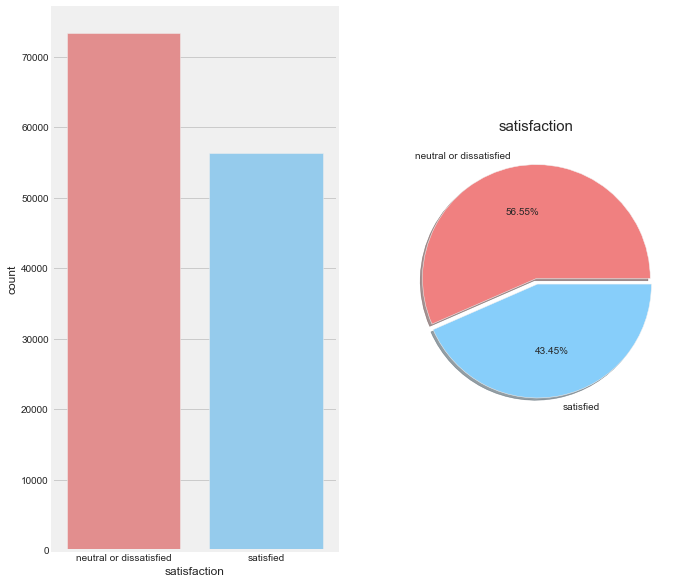

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.countplot(x='satisfaction',data = data, palette=["#f08080","#87cefa"])

plt.subplot(1,2,2)
plt.pie(data['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('satisfaction', fontsize=15)

plt.show()

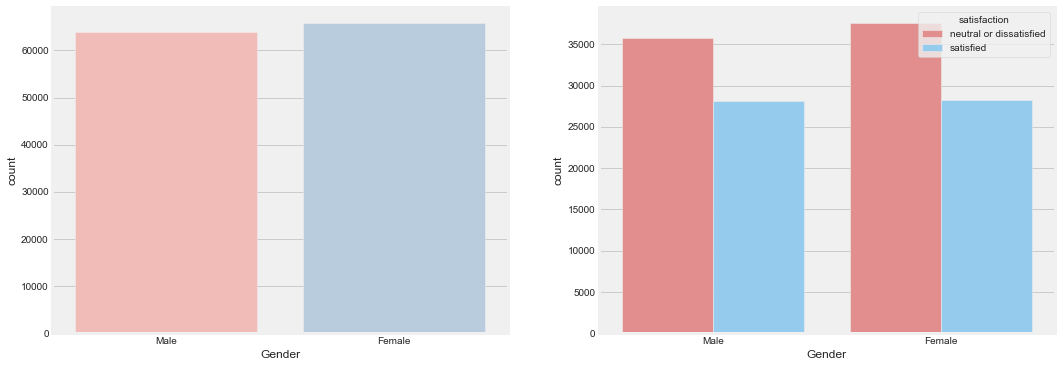

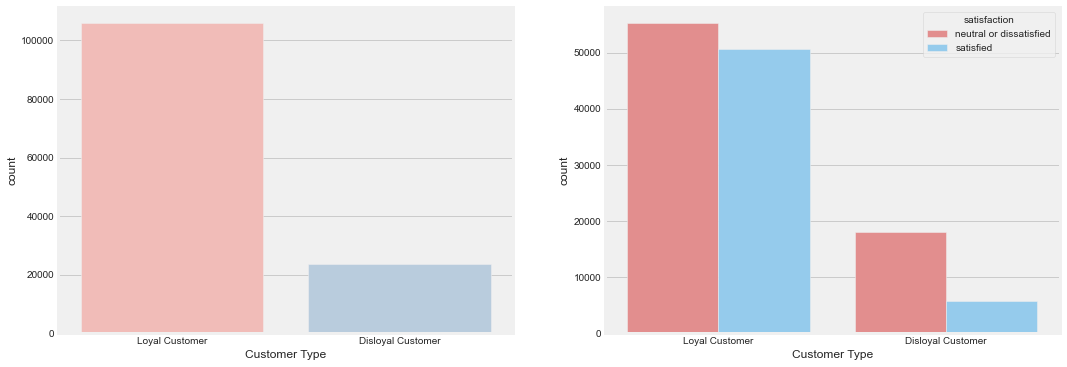

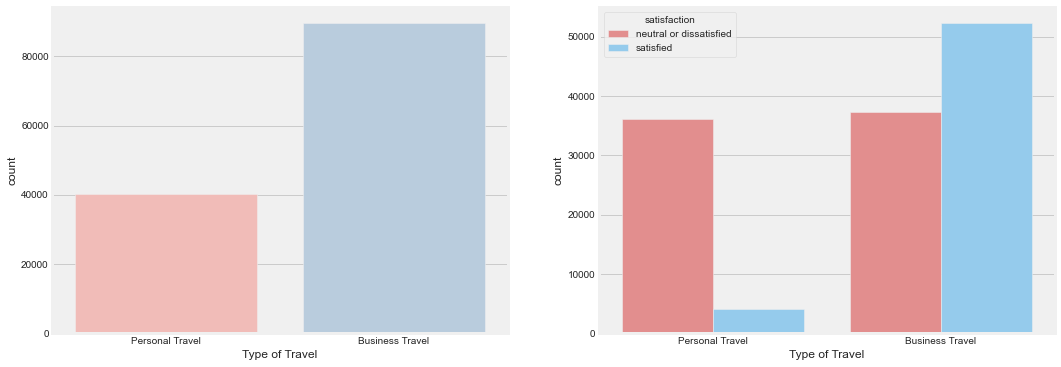

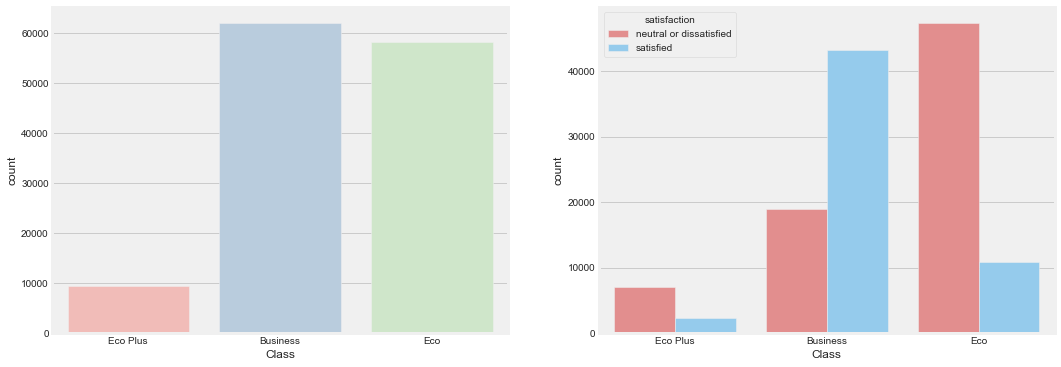

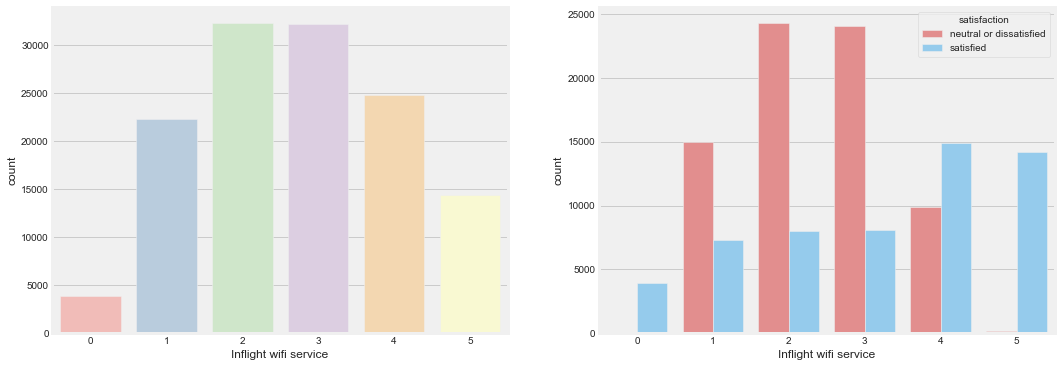

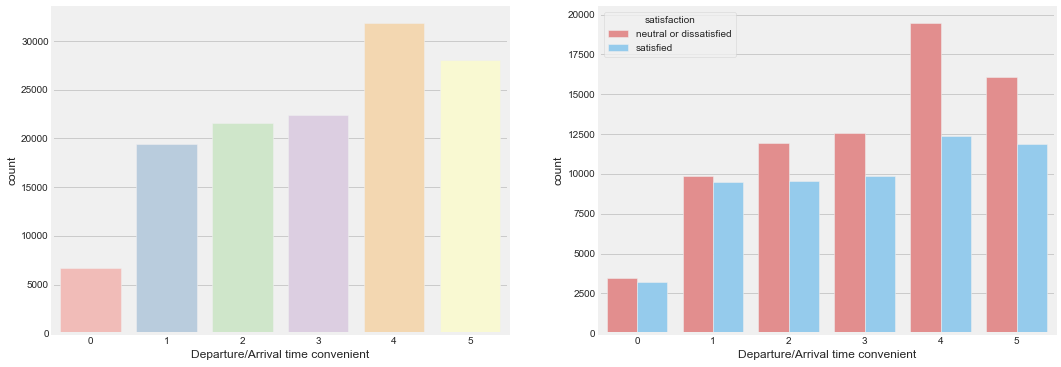

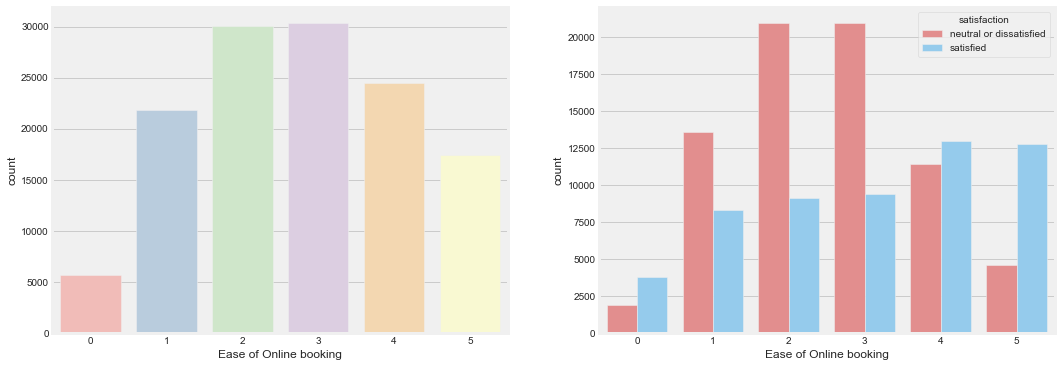

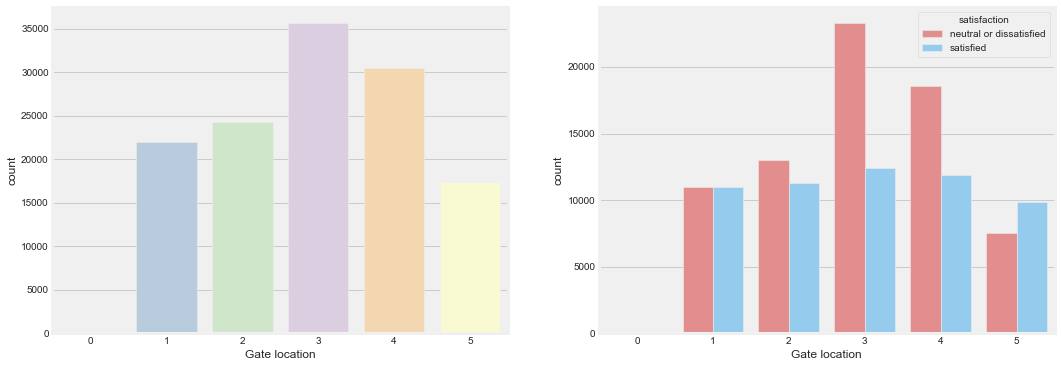

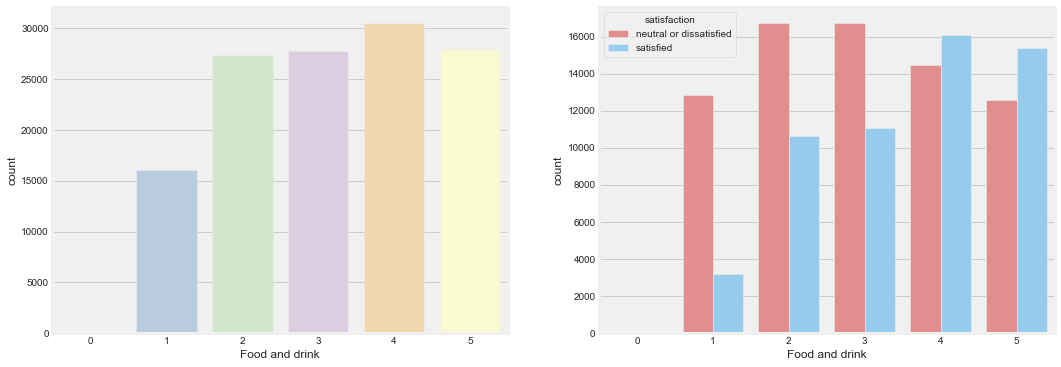

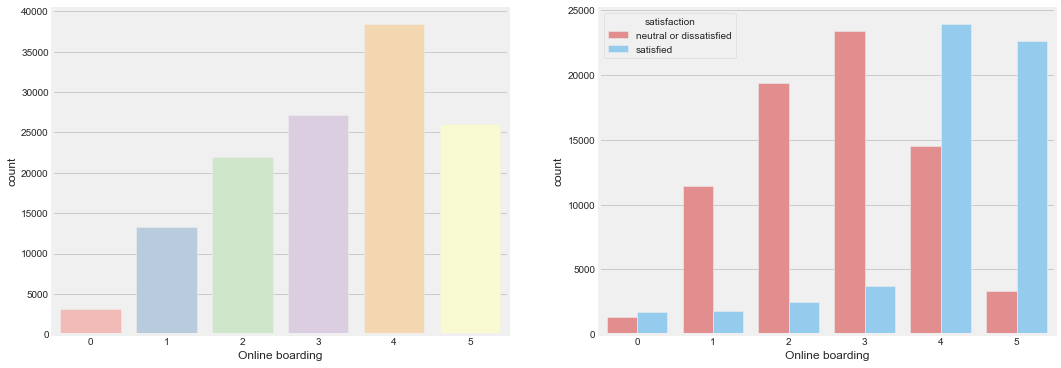

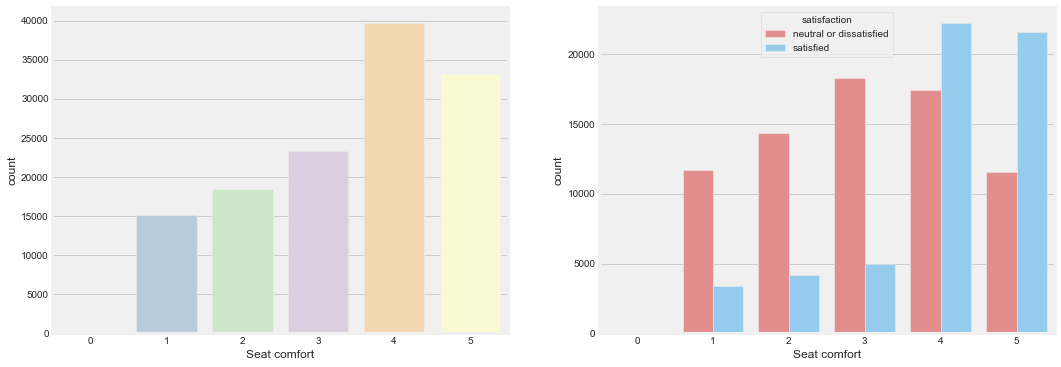

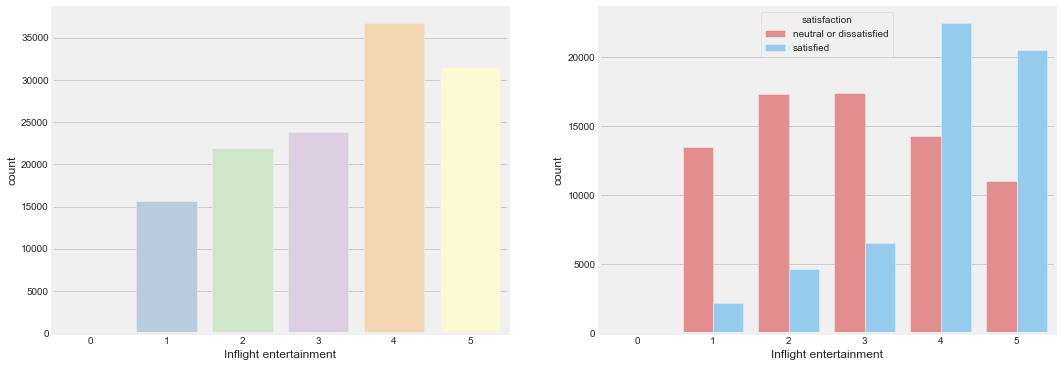

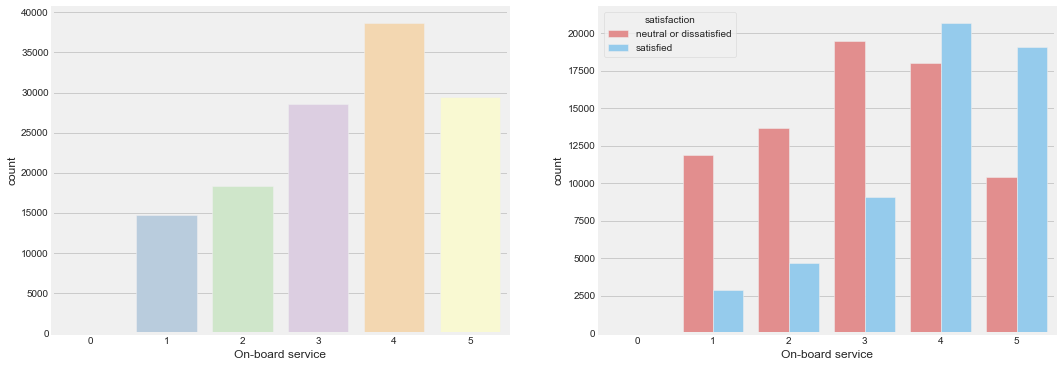

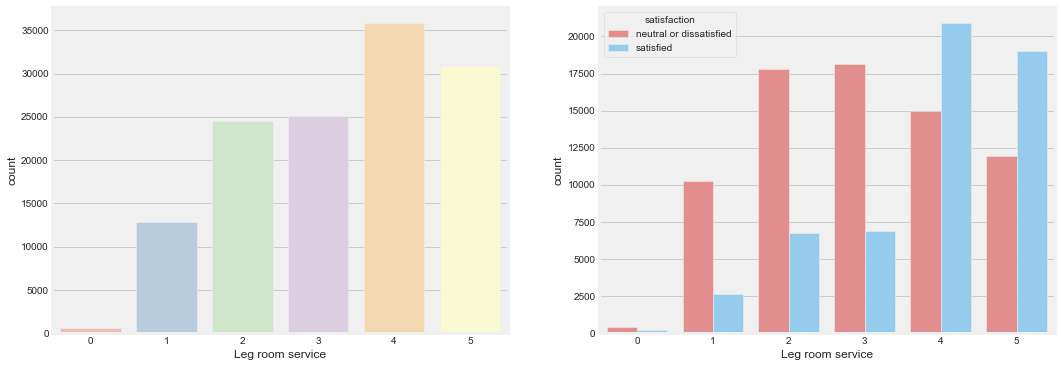

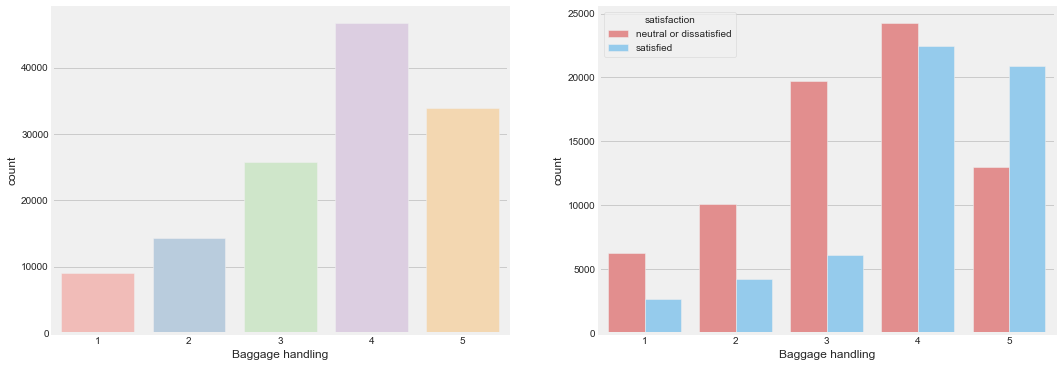

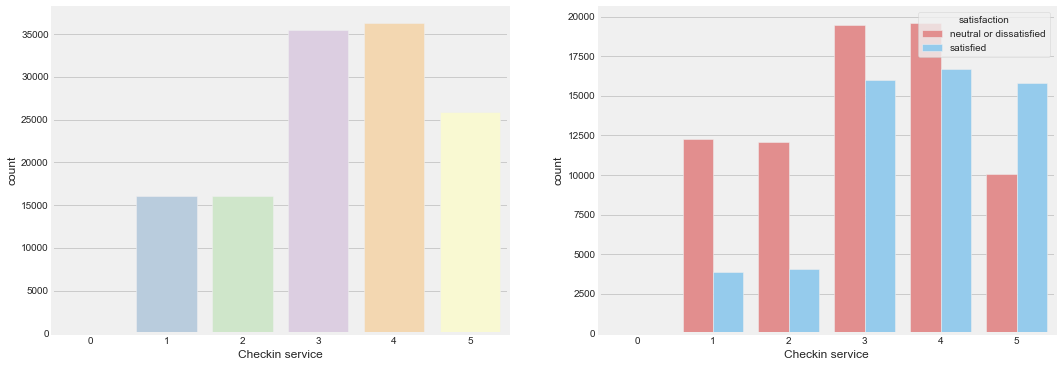

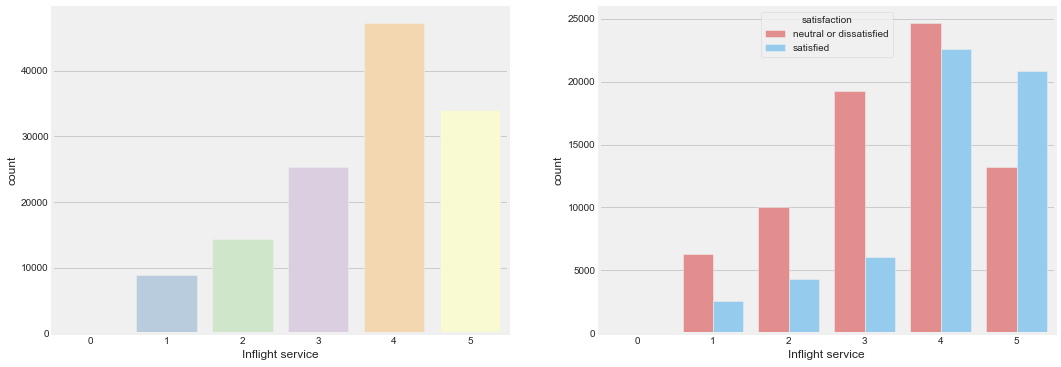

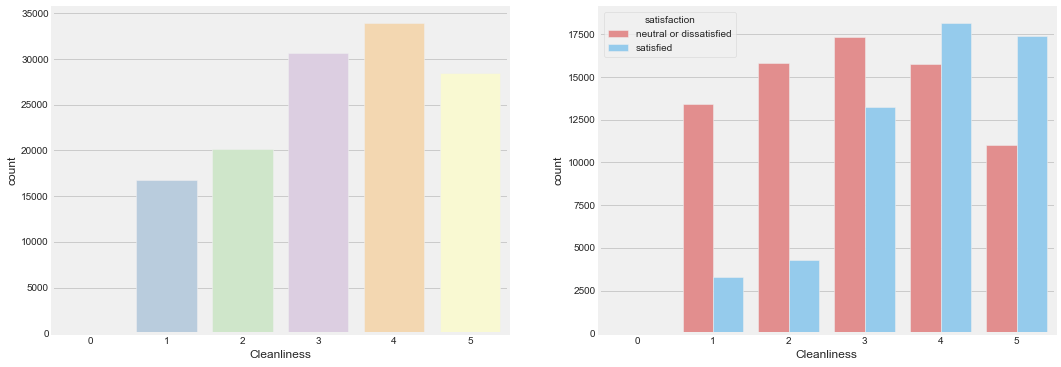

In [24]:
categorics=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in categorics:
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.countplot(x=data[i],palette="Pastel1")
    
    plt.subplot(1,2,2)
    sns.countplot(x=data[i],hue=data.satisfaction, palette=["#f08080","#87cefa"])
    plt.show()


Female and male data amounts are close to each other. In the Customer Type feature, which is divided into two groups as Loyal customer and disloyal customer, the number of Loyal customers is more than the number of Disloyal customers. We can say that half of the Loyal customers are satisfied and half are neutral or dissatisfied. But in Disloyal customers, the number of satisfied passengers is less than the number of neutral or dissatisfied. Type of Travel feature consists of two categories as Personal and Business travel. It seems that the number of passengers making Business travel is higher than those making Personnel travel. While the number of satisfied passengers is higher in Business travel, the number of satisfied passengers is very low in Personal travel. Class features are divided into three categories: Eco, Business, and Eco Plus. While the number of passengers in the Business and Eco classes is close to each other, the number of passengers in the Eco Plus class is much less. While the majority of passengers in Business class are satisfied, the majority of passengers in Eco class are neutral or dissatisfied. In the other features, there are 6 categories from 1 to 5 (increasing satisfaction rates), while 0 represents unimplemented features. Neutral or dissatisfied passengers appear more in all categories of the Departure/Arrival time convenient feature. As we can predict for other features, neutral or dissatisfied passengers are more at low satisfaction levels like 0-1-2 at the beginning, while satisfied passengers are more at high satisfaction levels like 4-5.


Removing [ 'Gender' , 'Customer_Type' , 'Type_of_Travel' , 'Class' ] features from categorics list so I only have categorical features having 0-1-2-3-4-5 scores can stay in list.

In [25]:
for i in ['Gender','Customer Type','Type of Travel','Class']:
  categorics.remove(i)

In [26]:
categorics

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [27]:
data[categorics].mean().sort_values(ascending = False)

Inflight service                     3.642193
Baggage handling                     3.632114
Seat comfort                         3.441361
On-board service                     3.383023
Inflight entertainment               3.358077
Leg room service                     3.350878
Checkin service                      3.306267
Cleanliness                          3.286326
Online boarding                      3.252633
Food and drink                       3.204774
Departure/Arrival time convenient    3.057599
Gate location                        2.976925
Ease of Online booking               2.756876
Inflight wifi service                2.728696
dtype: float64

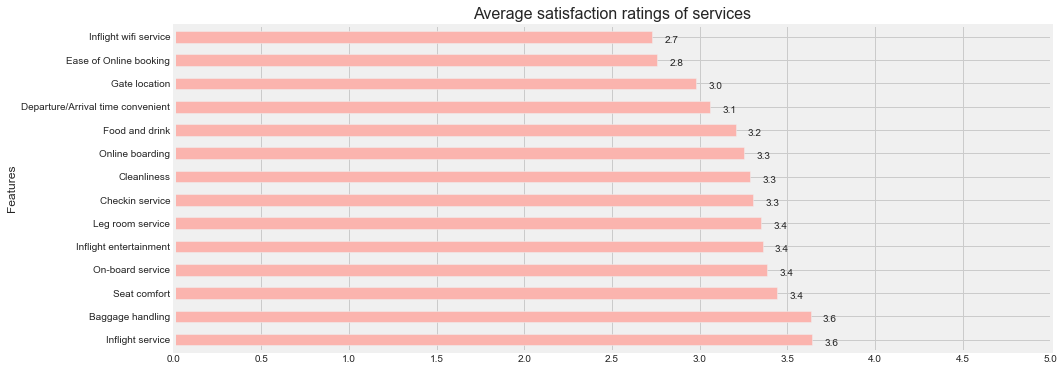

In [30]:
total = float(len(data))
ax = data[categorics].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(14,6))
plt.title('Average satisfaction ratings of services', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

The features with the highest average satisfaction rate are Inflight_service and Baggage_handling with average 3.6. The feature with the lowest satisfaction rate is Inflight_wifi_service with average 2.7.

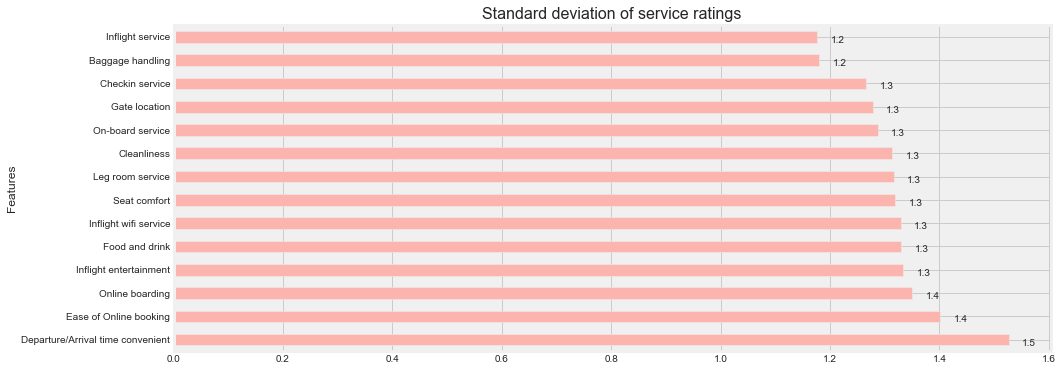

In [31]:
ax = data[categorics].std().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",figsize=(14,6))
plt.title('Standard deviation of service ratings', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.05, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

I also checked the standard deviation to account for any deviations between ratings. They are close to each other.

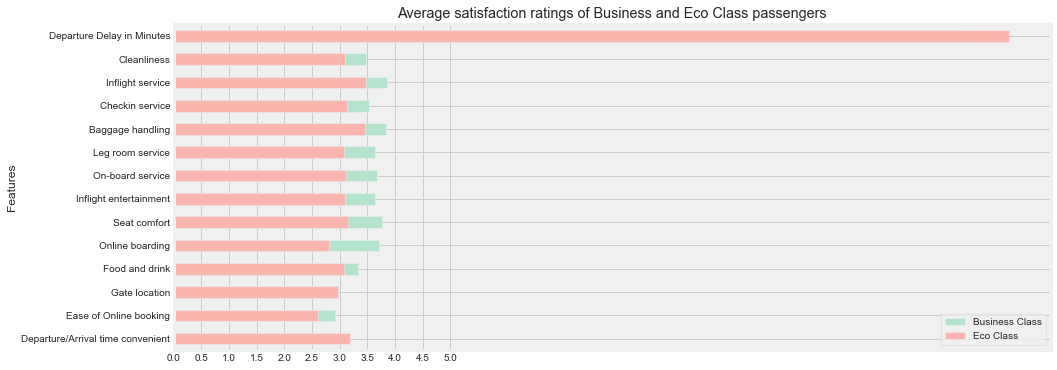

In [32]:
data[data["Class"]=="Business"].mean()[4:18].plot(kind="barh",legend=True,ylabel="Features",colormap="Pastel2",figsize=(14,6),label="Business Class",title="Average satisfaction ratings of Business and Eco Class passengers")
data[data["Class"]=="Eco"].mean()[4:18].plot(kind="barh",legend=True,colormap="Pastel1",label="Eco Class",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.show()

We can see that Business Class passengers give higher ratings to services than Eco Class passengers.

<Figure size 504x504 with 0 Axes>

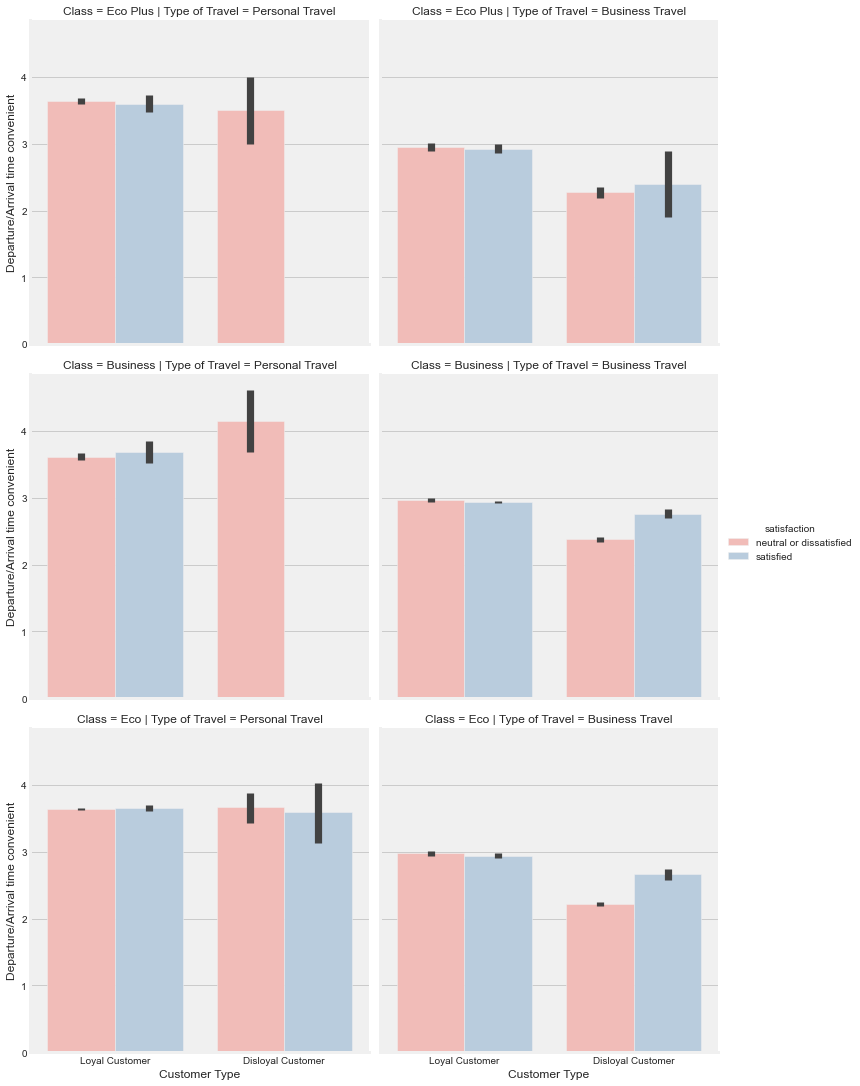

In [33]:
plt.figure(figsize=(7,7))
sns.catplot(y='Departure/Arrival time convenient',col='Type of Travel',x ='Customer Type',
            hue='satisfaction',row='Class', data=data, kind= 'bar',palette='Pastel1')
plt.show()

In [34]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)
table1=data.pivot_table(index=["Gender"],columns=["satisfaction"],aggfunc={"satisfaction":["count",percentage]},fill_value=0)
table1

satisfaction                                    \
                               count                        percentage   
satisfaction neutral or dissatisfied satisfied neutral or dissatisfied   
Gender                                                                   
Female                         37630     28269                   28.97   
Male                           35822     28159                   27.58   

                        
                        
satisfaction satisfied  
Gender                  
Female           21.77  
Male             21.68

In [35]:
gender="female"
for i,j,k,l in table1.values:
  print("Satisfaction rate for {} is: {:.3f}".format(gender,j/(i+j)))
  gender="male"

Satisfaction rate for female is: 0.429
Satisfaction rate for male is: 0.440


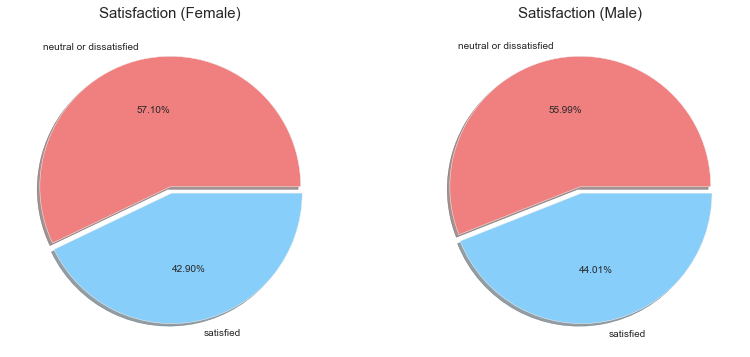

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(data.loc[data.Gender=="Female",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('Satisfaction (Female)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(data.loc[data.Gender=="Male",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightskyblue"])
plt.title('Satisfaction (Male)', fontsize=15)

plt.show()

When we look at the satisfaction rates of women and men, we see that both are around 43-44%. There is no dominance in satisfaction by gender. The dissatisfaction rate is higher in both gender

In [37]:
data.pivot_table(index=["Customer Type","Class"],columns=["satisfaction"],aggfunc={"satisfaction":["count",percentage]})

satisfaction            \
                                             count             
satisfaction               neutral or dissatisfied satisfied   
Customer Type     Class                                        
Disloyal Customer Business                    5569      3662   
                  Eco                        11669      1965   
                  Eco Plus                     842        73   
Loyal Customer    Business                   13425     39504   
                  Eco                        35697      8978   
                  Eco Plus                    6250      2246   

                                                              
                                        percentage            
satisfaction               neutral or dissatisfied satisfied  
Customer Type     Class                                       
Disloyal Customer Business                    4.29      2.82  
                  Eco                         8.98      1.51  
                  Eco Plus                    0.65      0.06  
Loyal Customer    Business                   10.34     30.42  
                  Eco                        27.48      6.91  
                  Eco Plus                    4.81      1.73

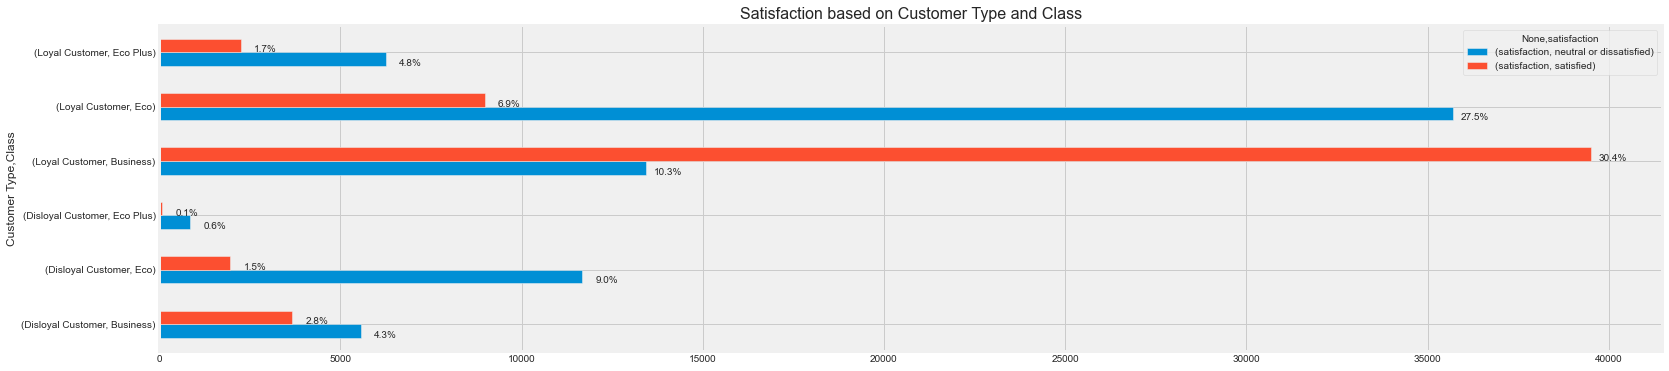

In [38]:
ax = data.pivot_table(index=["Customer Type","Class"],columns=["satisfaction"],aggfunc={"satisfaction":"count"}).plot(kind="barh",figsize=(24,6))
plt.title('Satisfaction based on Customer Type and Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1000, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

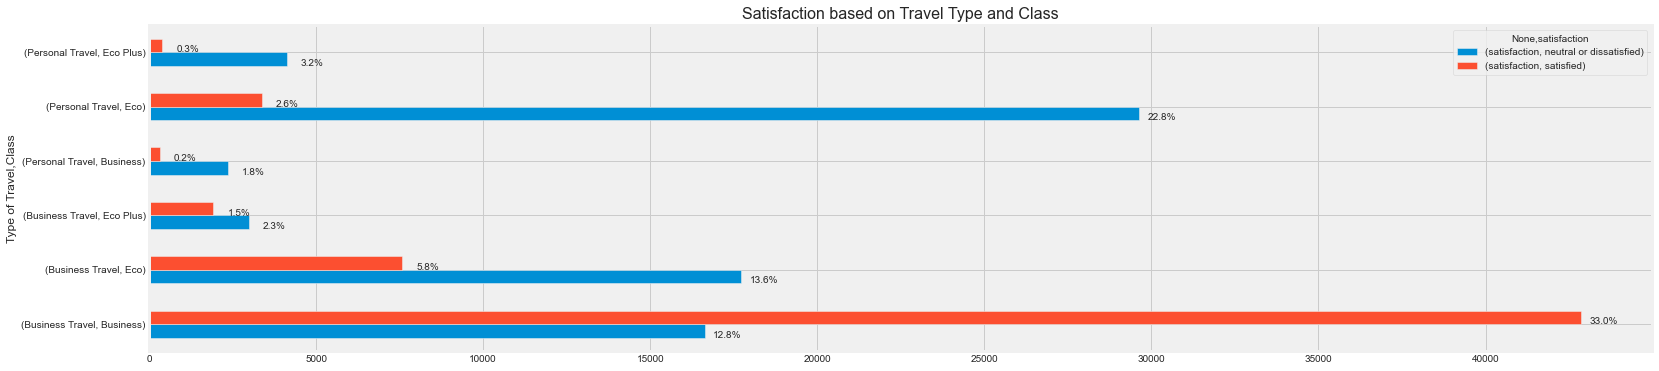

In [42]:
ax = data.pivot_table(index=["Type of Travel","Class"],columns=["satisfaction"],aggfunc={"satisfaction":"count"}).plot(kind="barh",figsize=(24,6))
plt.title('Satisfaction based on Travel Type and Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1100, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Business class passengers making business travel have the highest satisfaction rate (33.0%). Eco class passengers who make personal travel have the highest dissatisfaction rate (22.8%). We can say that travel type and class are both major factors in satisfaction.

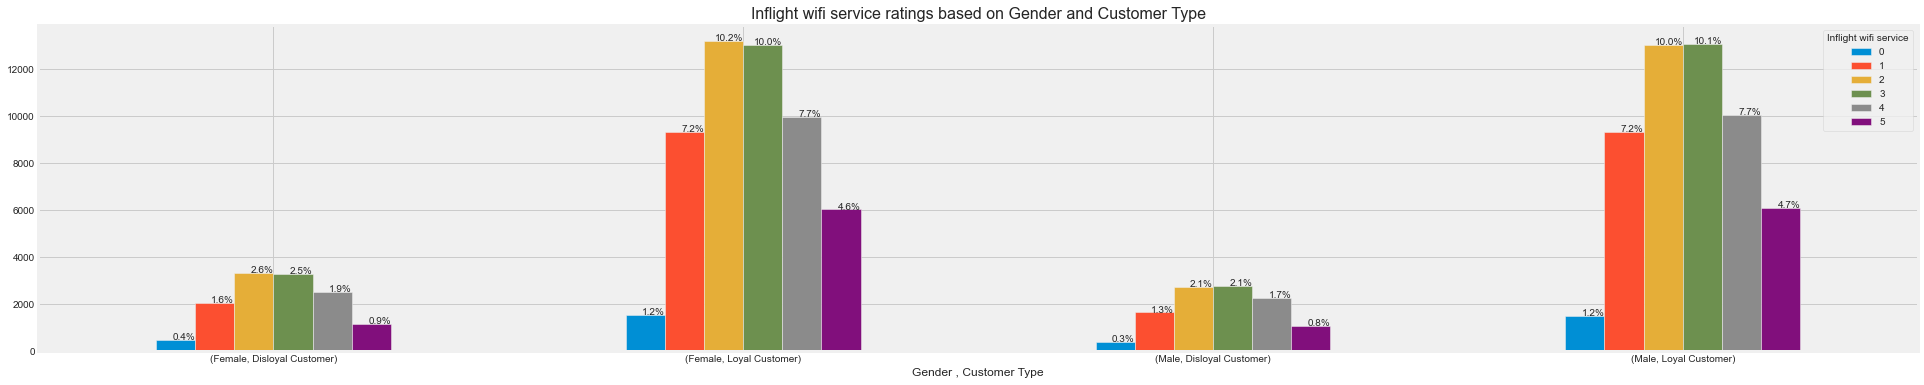

In [45]:
ax = pd.crosstab([data["Gender"], data["Customer Type"]],data["Inflight wifi service"],
            rownames=['Gender ', " Customer Type"],
            colnames=["Inflight wifi service"],
            dropna=False).plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Inflight wifi service ratings based on Gender and Customer Type', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

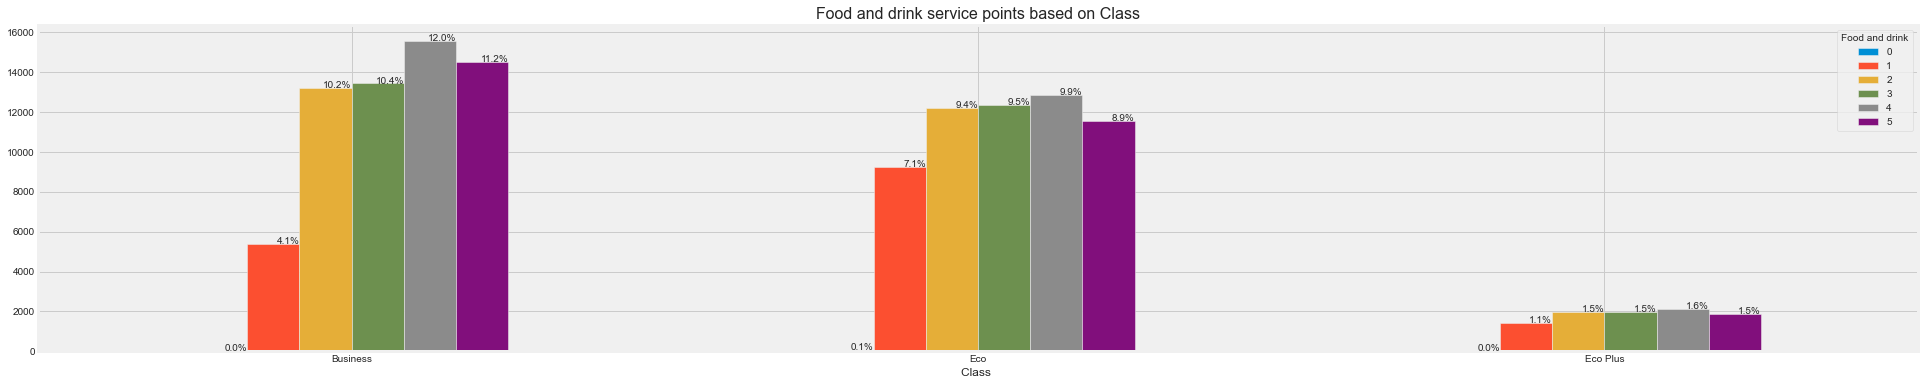

In [47]:
ax = pd.crosstab(data["Class"],data["Food and drink"],
            rownames=['Class '],
            colnames=['Food and drink'],
            dropna=False).plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Food and drink service points based on Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

The number of passengers in the eco plus class is low in the data. The number of business class passengers and eco class passengers is very close to each other. Business class passengers seem to give more points to the food and drink service.

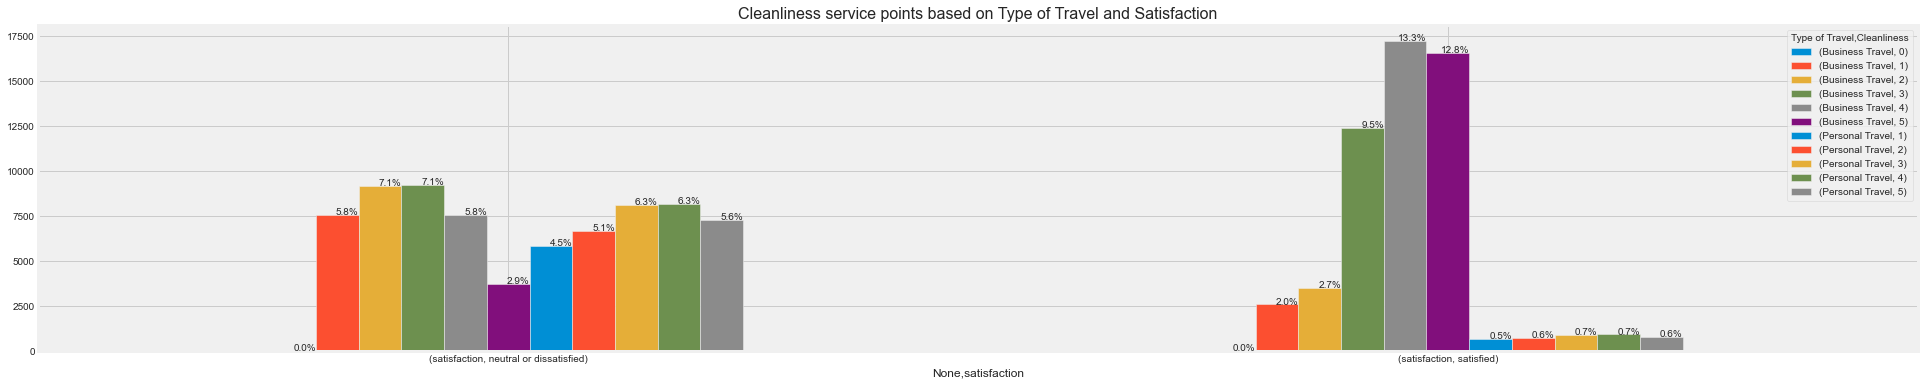

In [49]:
ax = data.pivot_table(index=["Type of Travel","Cleanliness"],columns=["satisfaction"],aggfunc={"satisfaction":"count"},fill_value=0).T.plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Cleanliness service points based on Type of Travel and Satisfaction', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

While business travel passengers were more satisfied, personal travel passengers were more dissatisfied. Neutral or dissatisfied passengers give similar rates to cleanliness regardless of the type of travel. But among satisfied passengers, business travel passengers give more points to cleanliness. The number of passengers who are satisfied and make personal travel is quite low.

Dividing age column to four groups by looking at the quartiles to check if any pattern will be seen in different groups

In [50]:
data["Age Group"]=pd.cut(data.Age,[np.min(data.Age),np.percentile(data.Age,25),np.percentile(data.Age,50),np.percentile(data.Age,75),np.max(data.Age)+1], right=False)

In [51]:
data[["Age","Age Group"]][:5]


,Age,Age Group
0,13,"[7.0, 27.0)"
1,25,"[7.0, 27.0)"
2,26,"[7.0, 27.0)"
3,25,"[7.0, 27.0)"
4,61,"[51.0, 86.0)"


In [52]:
table2=data.pivot_table(index=["Age Group"],columns=["satisfaction"],aggfunc={"satisfaction":"count"},fill_value=0)
table2

satisfaction          
satisfaction neutral or dissatisfied satisfied
Age Group                                     
[7.0, 27.0)                    22085      8910
[27.0, 40.0)                   19779     13289
[40.0, 51.0)                   13579     18636
[51.0, 86.0)                   18009     15593

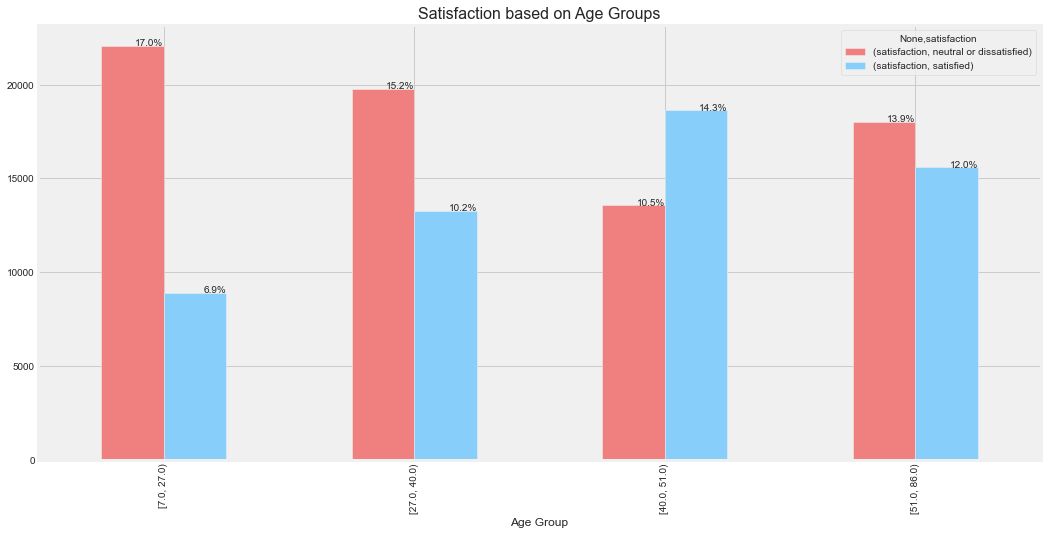

In [53]:
ax = table2.plot(kind="bar", figsize=(16,8), color=["#f08080","#87cefa"])
plt.title('Satisfaction based on Age Groups', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

While the majority of passengers between the ages of [40,51) are satisfied, the rate of dissatisfaction is higher for passengers in other age ranges

In [54]:
table3=data.pivot_table(index=["Age Group"],columns=["Baggage handling",],aggfunc={"Baggage handling":"count"})
table3

Baggage handling                         
Baggage handling                1     2     3      4     5
Age Group                                                 
[7.0, 27.0)                  1652  2624  7082  11916  7721
[27.0, 40.0)                 2150  3441  7196  12089  8192
[40.0, 51.0)                 2294  3826  5497  11465  9133
[51.0, 86.0)                 2932  4471  6076  11291  8832

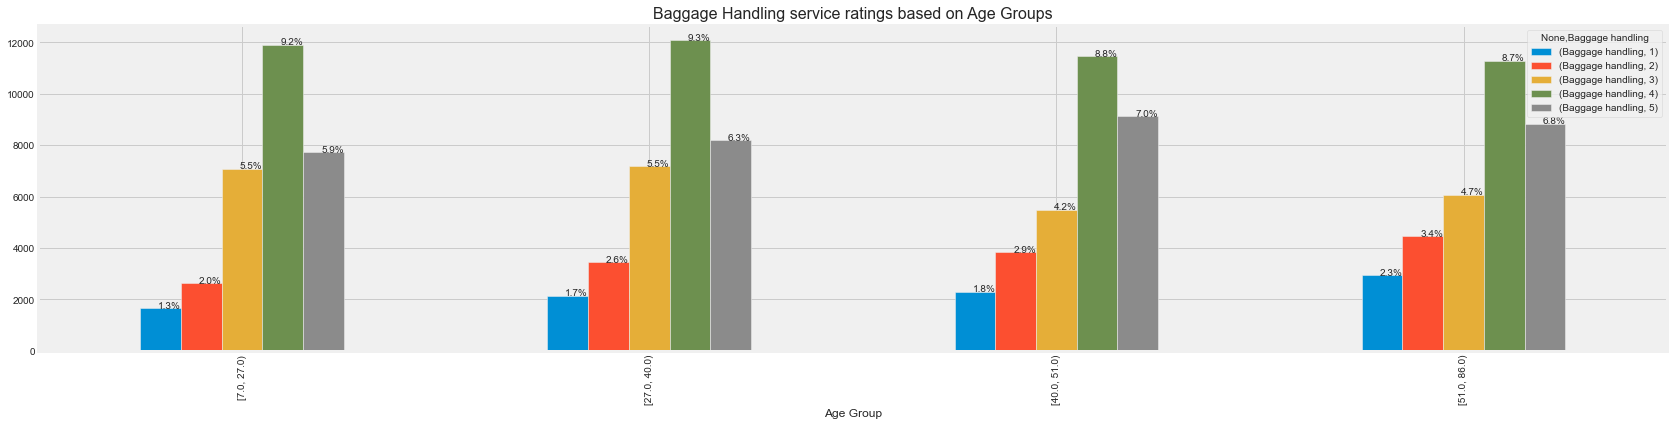

In [55]:
ax = table3.plot(kind="bar",figsize=(26,6))
plt.title('Baggage Handling service ratings based on Age Groups', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

When we look at the scores given to the baggage handling service by dividing the age groups, we can say that the scores are similar among age groups. I can say that age groups do not have an obvious effect on the scores.

In [56]:
data[(data['Departure Delay in Minutes'] == 0 ) & (data['Arrival Delay in Minutes'] == 0 )].groupby('satisfaction')["id"].count().reset_index().set_index("satisfaction")

,id
satisfaction,
neutral or dissatisfied,31345
satisfied,28006


When we look at the flights that do not delay on arrival and departure, the number of satisfied passenger still seems less.

# Visualizing numeric features

Creating a pairplot to see the distribution of numeric features and their relation with other numeric features.

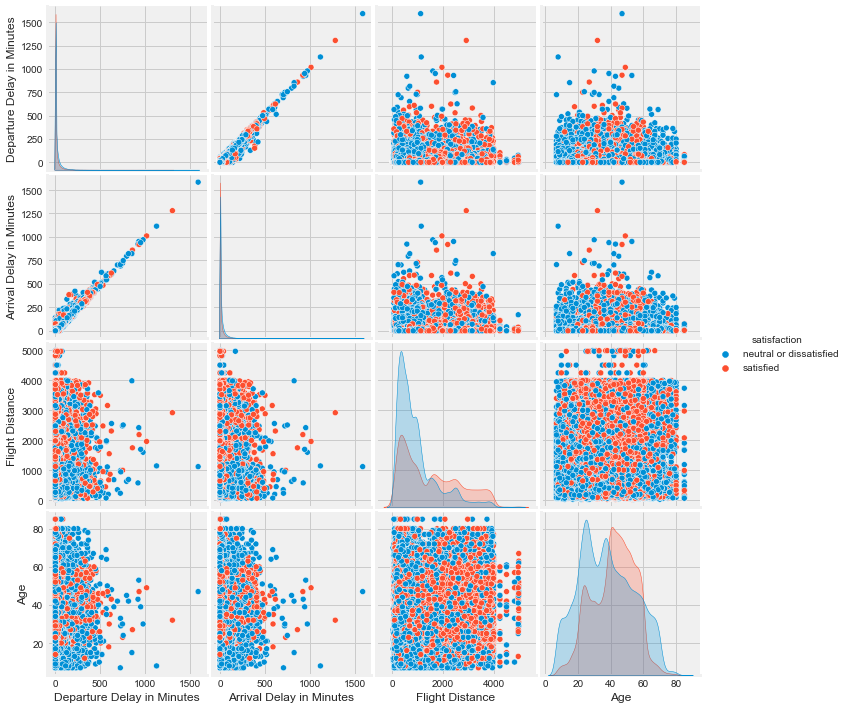

In [57]:
numerics=['Departure Delay in Minutes', 'Arrival Delay in Minutes','Flight Distance',"Age"]
sns.pairplot(data[[*numerics,"satisfaction"]],hue="satisfaction")
plt.show()

While there is a visible relationship between some numeric features (Arrival_Delay_in_Minutes and Departure_Delay_in_Minute), some are unrelated to each other (Flight_Distance and Age).

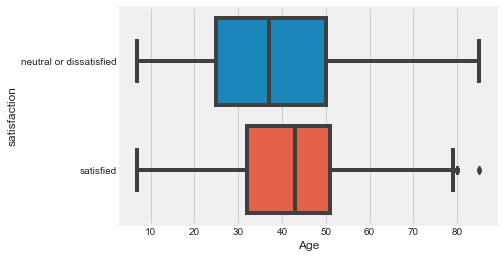

In [58]:
sns.boxplot(x="Age",y="satisfaction",data=data)
plt.show()

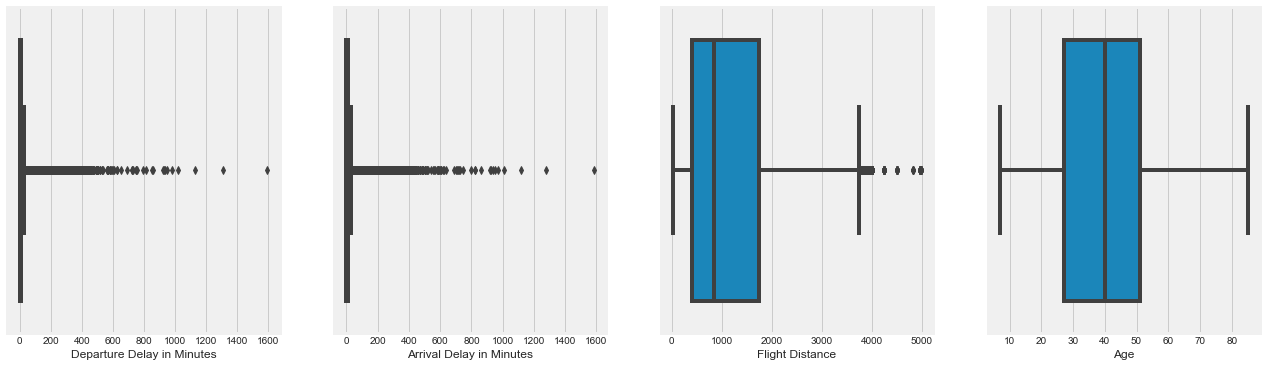

In [59]:
plt.figure(figsize=(20, 6))
for i,j in enumerate(numerics):
  plt.subplot(1,len(numerics),i+1)
  sns.boxplot(data[j])

There are outliers in data. I will handle them later.

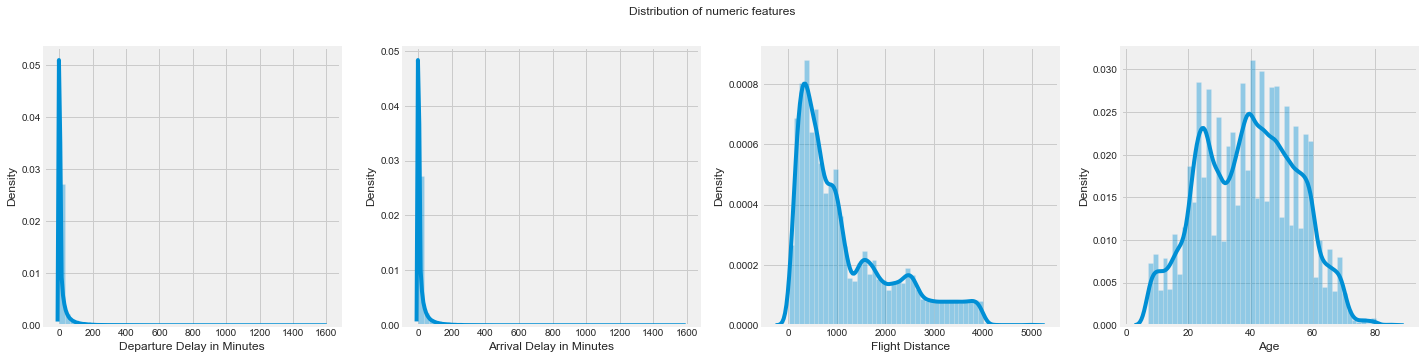

In [60]:
fig, ax = plt.subplots(1,len(numerics),figsize=(20,5))
fig.suptitle("Distribution of numeric features",y=1)
for i,j in enumerate(numerics):
  sns.distplot(x=data[j],ax=ax[i])
  ax[i].set_xlabel(j)
fig.tight_layout(pad=1.5)

In [61]:
data.drop(["id","Age Group"],axis=1,inplace=True)
data_backup=data.copy()
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


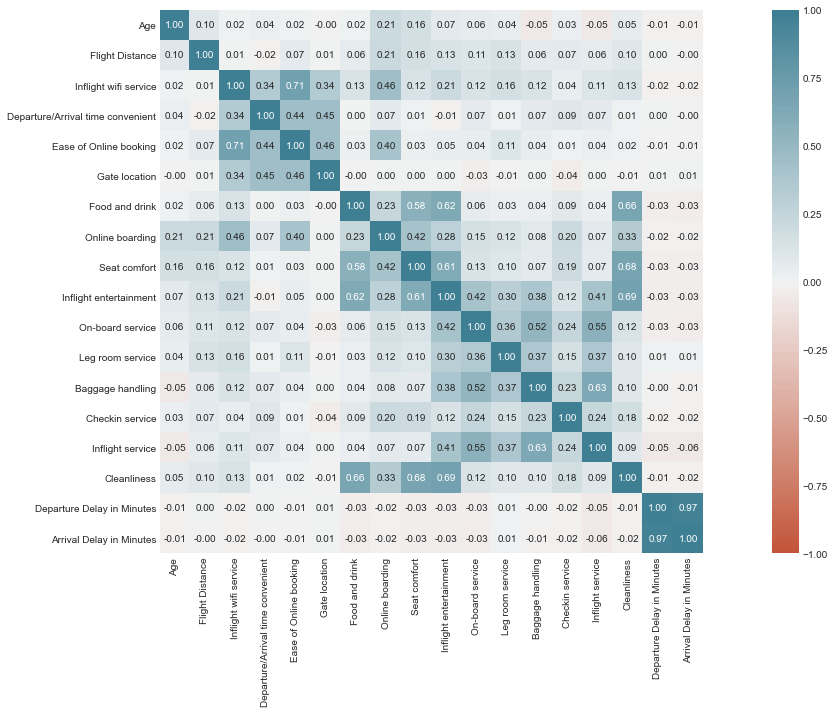

In [62]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True,fmt='.2f',)
plt.show()

"Ease of Online booking" and "Inflight wifi service" are positive correlated with ratio 0.71.

"Inflight entertainment" and "Food and drink" are positive correlated with ratio 0.62.

"Inflight entertainment" and "Seat comfort" are positive correlated with ratio 0.61.

"Inflight service" and "Baggage handling" are positive correlated with ratio 0.63.

"Cleanliness" and "Food and drink" are positive correlated with ratio 0.66.

"Cleanliness" and "Seat comfort" are positive correlated with ratio 0.68.

"Cleanliness" and "Inflight entertainment" are positive correlated with ratio 0.69.

'Departure delay in minutes' and 'Arrival delay in minutes' columns are highly positive correlated (0.97) as we have seen. Normally we should drop one of them. Since 'Arrival_Delay_in_Minutes' column has null values, it would be our first choice. But 'Departure delay in minutes' and 'Arrival_Delay_in_Minutes' columns have full of zero values, so they are not very important features in model. I will drop both of these columns.

In [63]:
data.drop(["Arrival Delay in Minutes","Departure Delay in Minutes"],axis=1,inplace=True)

# Checking correlation to target

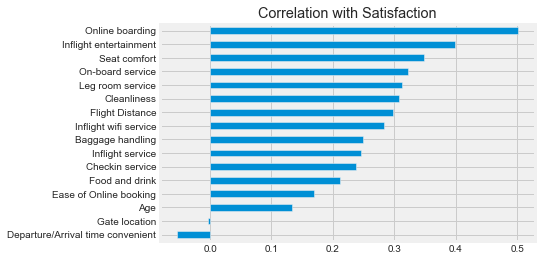

In [64]:
data_temp=data.copy()
data_temp["satisfaction"]=data_temp["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
data_temp.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='barh',title="Correlation with Satisfaction")
plt.show() 

Features that slightly correlates more with customer satisfaction are 'Inflight wifi service', 'Flight Distance', 'Cleanliness', 'Leg room service', 'On-board service', 'Seat comfort', 'Inflight entertainment',and 'Online boarding'.

Among features "Online boarding" has the maximum correlation to target, i will check its correlation with other features.

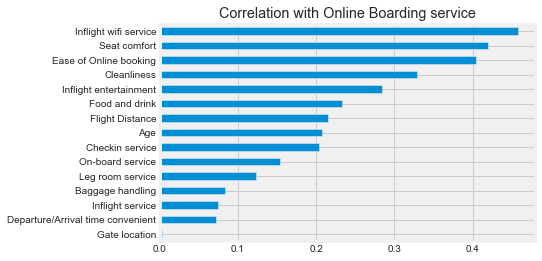

In [66]:
data_temp.corr()['Online boarding'].sort_values().drop(['Online boarding','satisfaction']).plot(kind='barh',title="Correlation with Online Boarding service")
plt.show()

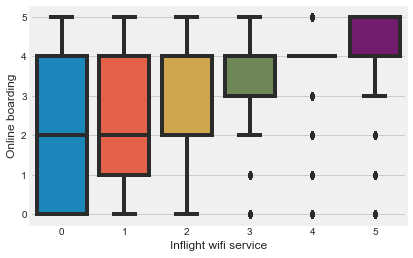

In [67]:
sns.boxplot(x=data['Inflight wifi service'], y = data_temp['Online boarding'])
plt.show()

As the score given to the Inflight wifi service increases, the range distributed to online boarding decreases and its score increases. People who gets better service of inflight wifi are more likely to give better rating for online boarding.

# PRE-PROCESSING
Encoding categoric features



In [68]:
#categorics
data[["Gender","Customer Type","Type of Travel","Class","satisfaction"]].head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,Disloyal Customer,Business Travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business Travel,Business,satisfied
3,Female,Loyal Customer,Business Travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business Travel,Business,satisfied


We have to transform our categoric features to numerics so our model can understand better and learn from the features.

In [70]:
data['Class'] = data['Class'].map({'Business':2,'Eco Plus':1,'Eco':0})
data["satisfaction"]=data["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

In [71]:
#for nominal features,
data_new=pd.get_dummies(data,drop_first=True)
#i use drop_first parameter so my model does not get any confusion by counting some features second time
data_new.reset_index(inplace=True)
data_new.drop("index",axis=1,inplace=True)
data_new.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,4,3,4,4,5,5,0,1,1,1
1,25,2,235,3,2,3,3,1,3,1,...,1,5,3,1,4,1,0,1,0,0
2,26,2,1142,2,2,2,2,5,5,5,...,4,3,4,4,4,5,1,0,1,0
3,25,2,562,2,5,5,5,2,2,2,...,2,5,3,1,4,2,0,0,1,0
4,61,2,214,3,3,3,3,4,5,5,...,3,4,4,3,3,3,1,1,1,0


In [72]:
data_new[["Gender_Male","Customer Type_Loyal Customer","Type of Travel_Personal Travel","Class","satisfaction"]].head()

,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class,satisfaction
0,1,1,1,1,0
1,1,0,0,2,0
2,0,1,0,2,1
3,0,1,0,2,0
4,1,1,0,2,1


In [74]:
data_new.columns

Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Personal Travel'],
      dtype='object')

# Outlier Detection

I will use Local Outlier Factor Method to detect and drop outliers.

In [75]:
df_local = data_new.copy()
temp = df_local.drop("satisfaction",axis=1)
local_outlier = LocalOutlierFactor(n_neighbors=2).fit_predict(temp)
outlier_local = list(np.where(local_outlier==-1)[0])
del temp
print(f"Outlier Count: {len(outlier_local)} \nSample Count: {len(df_local)} \nFraction: {round(len(outlier_local)/len(df_local),3)}")
df_local=df_local.drop(outlier_local).reset_index(drop=True)

Outlier Count: 1520 
Sample Count: 129880 
Fraction: 0.012


# Feature Transformation

The assumptions of some machine learning models are based on the normality of features. I will try to make the distribution of my features look like a normal distribution with some transformation operations. Different methods can be used to see which one is better for the data. I will mostly check "Flight_Distance' and "Age" columns.

Methods i use:

1) Log Transformation

2) Square Root Transformation

3) Box Cox Transformation

In [76]:
#Log Transformation
df_log=df_local.copy()
df_log["Flight Distance"]=np.log(df_log["Flight Distance"])
df_log["Age"]=np.log(df_log["Age"])

In [77]:
#Square-Root Transformation
df_sqrt=df_local.copy()
df_sqrt["Flight Distance"]=np.sqrt(df_sqrt["Flight Distance"])
df_sqrt["Age"]=np.sqrt(df_sqrt["Age"])

In [79]:
#Box Cox Transformation
df_boxcox=df_local.copy()
df_boxcox["Flight Distance"],lmbda=boxcox(df_boxcox["Flight Distance"],lmbda=None)
df_boxcox["Age"],lmbda=boxcox(df_boxcox["Age"],lmbda=None)

# Visualizing Transformed Features

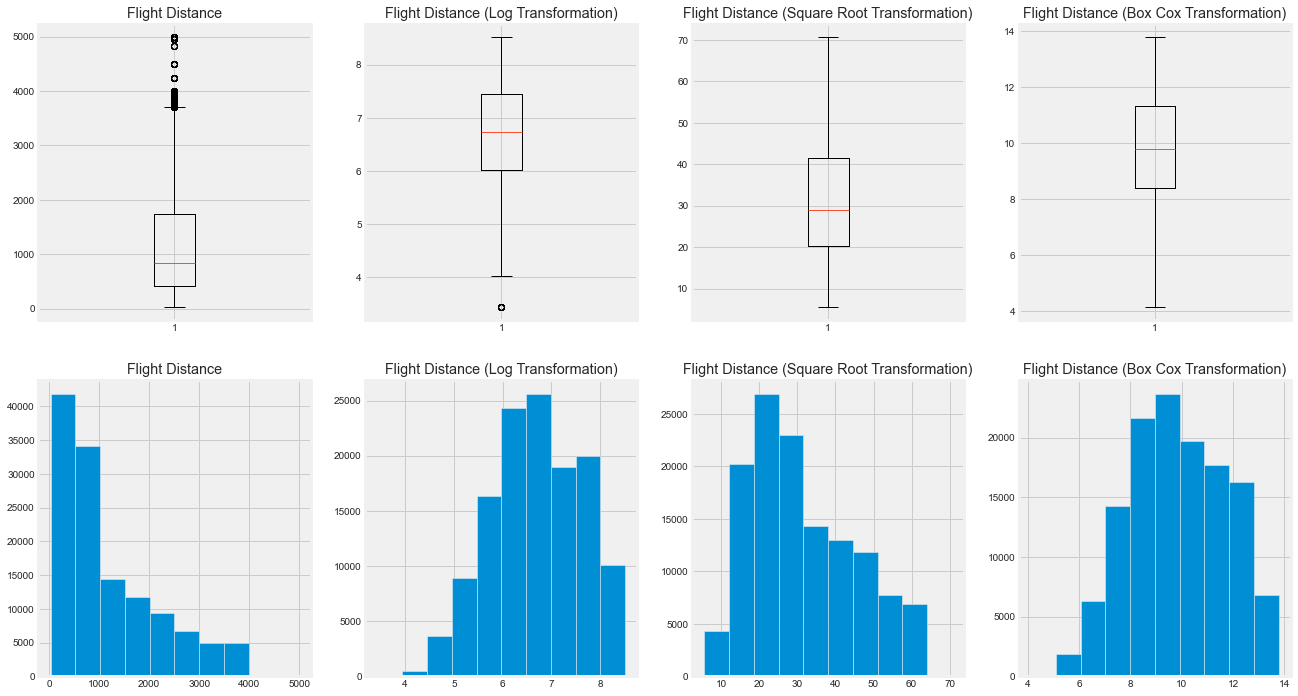

In [80]:
#Flight Distance feature
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.boxplot(df_local['Flight Distance'])
plt.title('Flight Distance')

plt.subplot(2, 4, 2)
plt.boxplot(df_log["Flight Distance"])
plt.title('Flight Distance (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(df_sqrt['Flight Distance'])
plt.title('Flight Distance (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(df_boxcox['Flight Distance']);
plt.title('Flight Distance (Box Cox Transformation)')

plt.subplot(2, 4, 5)
plt.hist(df_local['Flight Distance'])
plt.title('Flight Distance')

plt.subplot(2, 4, 6)
plt.hist(df_log["Flight Distance"])
plt.title('Flight Distance (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(df_sqrt['Flight Distance'])
plt.title('Flight Distance (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(df_boxcox['Flight Distance']);
plt.title('Flight Distance (Box Cox Transformation)')

plt.show()

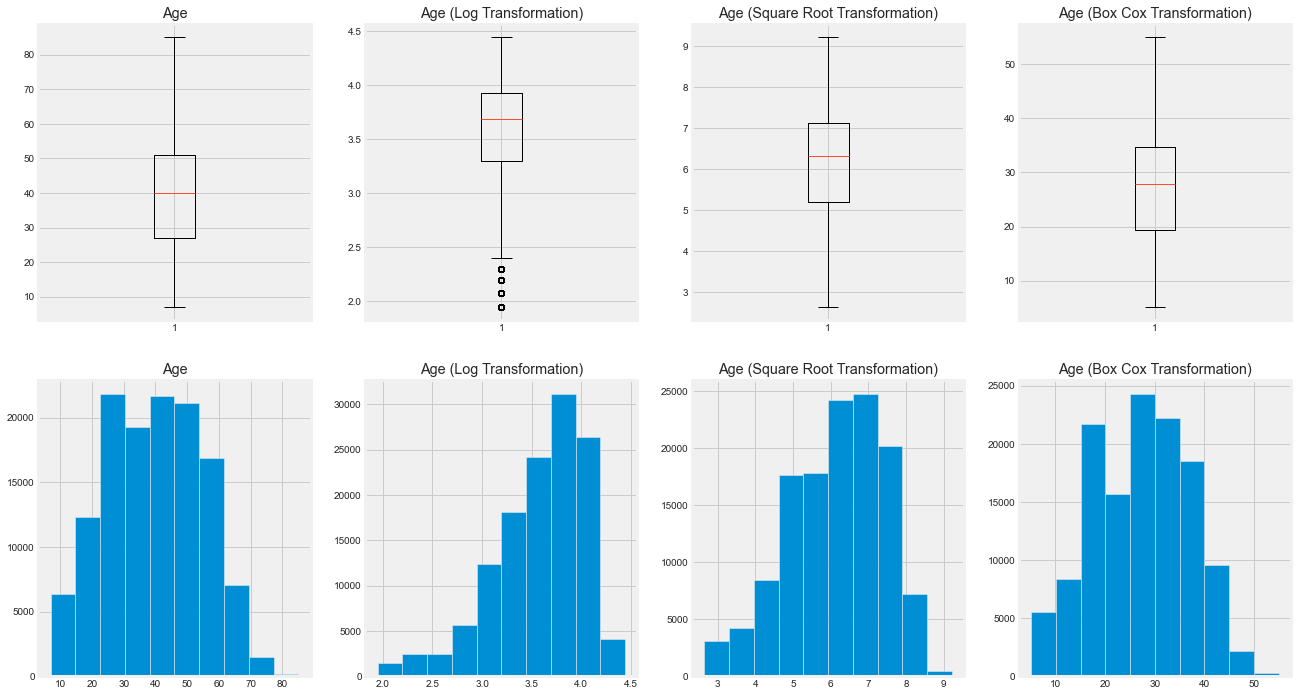

In [81]:
#Age Feature
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.boxplot(df_local['Age'])
plt.title('Age')

plt.subplot(2, 4, 2)
plt.boxplot(df_log["Age"])
plt.title('Age (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(df_sqrt['Age'])
plt.title('Age (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(df_boxcox['Age']);
plt.title('Age (Box Cox Transformation)')

plt.subplot(2, 4, 5)
plt.hist(df_local['Age'])
plt.title('Age')

plt.subplot(2, 4, 6)
plt.hist(df_log["Age"])
plt.title('Age (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(df_sqrt['Age'])
plt.title('Age (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(df_boxcox['Age']);
plt.title('Age (Box Cox Transformation)')

plt.show()

In [82]:
for j in ["Flight Distance","Age"]:
  transforms=[df_local[j], df_log[j], df_sqrt[j], df_boxcox[j]]
  processes=["original","log","square root","box cox"]
  for i,k in zip(transforms,processes):
    print(f"Normality for {j} Feature ({k}):",stats.shapiro(i))

Normality for Flight Distance Feature (original): ShapiroResult(statistic=0.8628793954849243, pvalue=0.0)
Normality for Flight Distance Feature (log): ShapiroResult(statistic=0.9800770282745361, pvalue=0.0)
Normality for Flight Distance Feature (square root): ShapiroResult(statistic=0.9490771293640137, pvalue=0.0)
Normality for Flight Distance Feature (box cox): ShapiroResult(statistic=0.9811434745788574, pvalue=0.0)
Normality for Age Feature (original): ShapiroResult(statistic=0.988400936126709, pvalue=0.0)
Normality for Age Feature (log): ShapiroResult(statistic=0.9298510551452637, pvalue=0.0)
Normality for Age Feature (square root): ShapiroResult(statistic=0.9773279428482056, pvalue=0.0)
Normality for Age Feature (box cox): ShapiroResult(statistic=0.9880236983299255, pvalue=0.0)


Even if I do transformation, my features still do not have a normal distribution. That's why I'm going to continue without transformation.

In [83]:
from sklearn.decomposition import FactorAnalysis

In [84]:
X = df_local.drop("satisfaction",axis=1)
y = df_local['satisfaction']

In [86]:
X.shape

(128360, 20)

In [87]:
transformer = FactorAnalysis(n_components=7, random_state=0)
X_transformed = transformer.fit_transform(X)

In [90]:
X_transformed.shape

(128360, 7)

<AxesSubplot:>

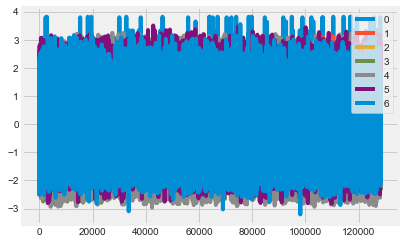

In [96]:
x_df = pd.DataFrame(X_transformed)
x_df.plot()